Resolver

$$U_{xx} + U_{yy} = 0, x\in[-1,1], y \in [-1,1]$$
$$U(x,-1) = 1, U(x,1) = 0$$
$$U_x(-1,y) = -\frac{1}{2}U(-1,y)$$
$$U_x(1,y) = U(1,y)$$
$$nx=ny = 8, tol = 10^{-5}$$

Pasando a su forma discreta

$$\frac{U_{i-1,j}-2U_{ij}+U_{i+1,j}}{h²} + \frac{U_{i,j-1}-2U_{ij}+U_{i,j+1}}{k²} = 0 $$

llamando $\lambda = h/k$

$$U_{i,j} = \frac{1}{2(1+\lambda ^2)}(U_{i+1,j} + U_{i-1,j} + \lambda^2(U_{i,j-1} + U_{i,j+1} ))$$

Dadas las condiciones de frontera tenemos que $i = 0,1,2 \dots nx$ y $j=1,2 \dots ny - 1$

Ahora analizando en los extremos para $i=0$ y $i=nx$

para $i = 0$ tenemos que:

$$U_{0,j} = \frac{1}{2(1+\lambda ^2)}(U_{1,j} + U_{-1,j} + \lambda^2(U_{0,j-1} + U_{0,j+1} ))$$

Como no conocemos $U_{-1,j}$  usamos la condición $U_x(-1,y) = \frac{-1}{2}U(-1,y)$

$$\frac{U_{1,j} - U_{-1,j}}{2h} = \frac{-1}{2}U_{0,j} $$
$$U_{-1,j} = U_{1,j} + hU_{0,j} $$

De donde tenemos :

$$U_{0,j} = \frac{1}{2(1+\lambda ^2)}(U_{1,j} + U_{1,j} + hU_{0,j} + \lambda^2(U_{0,j-1} + U_{0,j+1} ))$$


para $i = nx$ tenemos que:

$$U_{nx,j} = \frac{1}{2(1+\lambda ^2)}(U_{nx+1,j} + U_{nx-1,j} + \lambda^2(U_{nx,j-1} + U_{nx,j+1} ))$$

Como no conocemos $U_{1,j}$  usamos la condición $U_x(1,y) = U(1,y)$

$$\frac{U_{nx+1,j} - U_{nx-1,j}}{2h} = U_{nx,j} $$

$$U_{nx+1,j} = 2hU_{nx,j} + U_{nx-1,j}$$

De donde tenemos :

$$U_{nx,j} = \frac{1}{2(1+\lambda ^2)}(2hU_{nx,j} + U_{nx-1,j} + U_{nx-1,j} + \lambda^2(U_{nx,j-1} + U_{nx,j+1} ))$$

## Importando las librerías de Julia necesarias

In [1]:
using LinearAlgebra
using Plots

## Resolviendo con el método de Jacobi

para este método debemos considerar que:

para $i = 0$ tenemos que:

$$U_{0,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(U_{1,j}^{iter} + U_{1,j}^{iter} + hU_{0,j}^{iter} + \lambda^2(U_{0,j-1}^{iter} + U_{0,j+1}^{iter} ))$$

para $i = nx$ tenemos que:
$$U_{nx,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(2hU_{nx,j}^{iter} + U_{nx-1,j}^{iter} + U_{nx-1,j}^{iter} + \lambda^2(U_{nx,j-1}^{iter} + U_{nx,j+1}^{iter} ))$$

para los demás valores de $i$ y $j$

$$U_{i,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(U_{i+1,j}^{iter} + U_{i-1,j}^{iter} + \lambda^2(U_{i,j-1}^{iter} + U_{i,j+1}^{iter} ))$$

In [2]:
function jacobi(fa, fb, fc, fd, a, b, c, d, nx,ny,f, maxiter, tol)
    
    x = LinRange(a, b, nx+1)
    y = LinRange(c, d, ny+1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = zeros(ny+1, nx+1)

    λ = h/k

    U[1, :] = map(fa, x)
    U[end, :] = map(fb, x)
    # U[:, 1] = map(fc, y)
    # U[:, end] = map(fd, y)
    
    iter = 1
    error = tol + 1
    V = copy(U)

    while iter < maxiter && error > tol
        for j in 2:ny
            for i in 1:nx+1
                if i==1
                    V[j,i] = (1/(2*(1 + λ^2)))*(U[j,i+1] + U[j,i+1] + h*U[j,i] + λ^2*(U[j-1,i] + U[j+1,i]) )
                elseif i == nx+1
                    V[j,i] = (1/(2*(1 + λ^2)))*(2*h*U[j,i] + U[j,i-1] + U[j,i-1] + λ^2*(U[j-1,i] + U[j+1,i]) )
                else 
                    V[j,i] = (1/(2*(1 + λ^2)))*(U[j,i+1] + U[j,i-1] + λ^2*(U[j-1,i] + U[j+1,i]) )
                end
            end
        end
        error = maximum(abs.(U .- V))
        U = copy(V)
        iter += 1
    end
    
    return x,y,U, iter, error
end

jacobi (generic function with 1 method)

In [3]:
fa(x) = 1
fb(x) = 0
fc(y) = 0
fd(y) = 0
f(x,y) = 0


a,b = -1,1
c,d = -1,1
nx,ny = 8,8

maxiter = 5000
tol = 1e-5

x,y,U, iter, error = jacobi(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol)
display(U)
println("Number of iterations: $iter")
println("Error: $error")

9×9 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0
 1.11716   1.03374   0.998783  0.991612     1.11918   1.2491    1.49061
 1.12188   1.01902   0.969787  0.961046     1.18167   1.38665   1.71893
 1.05185   0.950688  0.90031   0.893836     1.16292   1.3969    1.75239
 0.921211  0.831582  0.786942  0.783783     1.05784   1.28569   1.62065
 0.739541  0.667501  0.632109  0.631558  …  0.872716  1.06738   1.34857
 0.517081  0.466786  0.44245   0.443154     0.621364  0.762578  0.964612
 0.265952  0.240123  0.227759  0.22847      0.322905  0.396979  0.502444
 0.0       0.0       0.0       0.0          0.0       0.0       0.0

Number of iterations: 410
Error: 9.90370453313183e-6


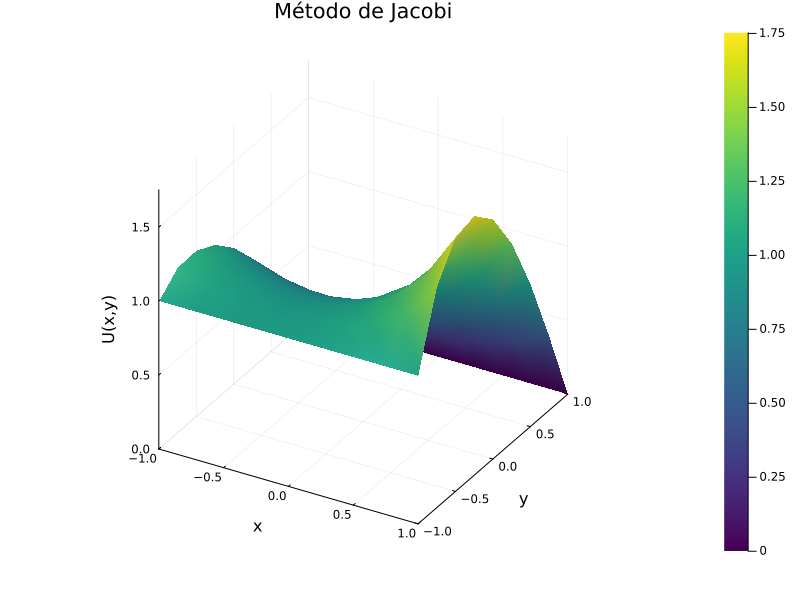

In [4]:
surface(x,y, U, 
        size=(800,600), 
        c=:viridis, 
        title="Método de Jacobi",
        xlabel="x",
        ylabel="y",
        zlabel="U(x,y)")

## Resolviendo el método de Gauss-Seidel

para este método debemos considerar que:

para $i = 0$ tenemos que:

$$U_{0,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(U_{1,j}^{iter} + U_{1,j}^{iter} + hU_{0,j}^{iter} + \lambda^2(U_{0,j-1}^{iter+1} + U_{0,j+1}^{iter} ))$$

para $i = nx$ tenemos que:
$$U_{nx,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(2hU_{nx,j}^{iter} + U_{nx-1,j}^{iter+1} + U_{nx-1,j}^{iter+1} + \lambda^2(U_{nx,j-1}^{iter+1} + U_{nx,j+1}^{iter} ))$$

para los demás valores de $i$ y $j$

$$U_{i,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(U_{i+1,j}^{iter} + U_{i-1,j}^{iter+1} + \lambda^2(U_{i,j-1}^{iter+1} + U_{i,j+1}^{iter} ))$$

In [5]:
function gauss_seidel(fa, fb, fc, fd, a, b, c, d, nx,ny,f, maxiter, tol)
    
    x = LinRange(a, b, nx+1)
    y = LinRange(c, d, ny+1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = zeros(ny+1, nx+1)

    λ = h/k

    U[1, :] = map(fa, x)
    U[end, :] = map(fb, x)
    # U[:, 1] = map(fc, y)
    # U[:, end] = map(fd, y)
    
    iter = 1
    error = tol + 1
    V = copy(U)

    while iter < maxiter && error > tol
        for j in 2:ny
            for i in 1:nx+1
                if i==1
                    V[j,i] = (1/(2*(1 + λ^2)))*(U[j,i+1] + U[j,i+1] + h*U[j,i] + λ^2*(V[j-1,i] + U[j+1,i]) )
                elseif i == nx+1
                    V[j,i] = (1/(2*(1 + λ^2)))*(2*h*U[j,i] + V[j,i-1] + V[j,i-1] + λ^2*(V[j-1,i] + U[j+1,i]) )
                else 
                    V[j,i] = (1/(2*(1 + λ^2)))*(U[j,i+1] + V[j,i-1] + λ^2*(V[j-1,i] + U[j+1,i]) )
                end
            end
        end
        error = maximum(abs.(U .- V))
        U = copy(V)
        iter += 1
    end
    
    return x,y,U, iter, error
end

gauss_seidel (generic function with 1 method)

In [6]:
fa(x) = 1
fb(x) = 0
fc(y) = 0
fd(y) = 0
f(x,y) = 0

a,b = -1,1
c,d = -1,1
nx,ny = 8,8

maxiter = 5000
tol = 1e-5

x,y,U, iter, error = gauss_seidel(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol)
display(U)
println("Number of iterations: $iter")
println("Error: $error")

9×9 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0
 1.11719   1.03377   0.998812  0.991643     1.11923   1.24917   1.49069
 1.12194   1.01908   0.969842  0.961104     1.18177   1.38677   1.71909
 1.05193   0.950762  0.900383  0.893914     1.16305   1.39707   1.7526
 0.921298  0.831664  0.787024  0.78387      1.05798   1.28587   1.62089
 0.739624  0.667579  0.632187  0.631641  …  0.872854  1.06755   1.34879
 0.517146  0.466847  0.44251   0.443218     0.621471  0.762715  0.964788
 0.265988  0.240157  0.227793  0.228506     0.322964  0.397054  0.502541
 0.0       0.0       0.0       0.0          0.0       0.0       0.0

Number of iterations: 226
Error: 9.76439520927741e-6


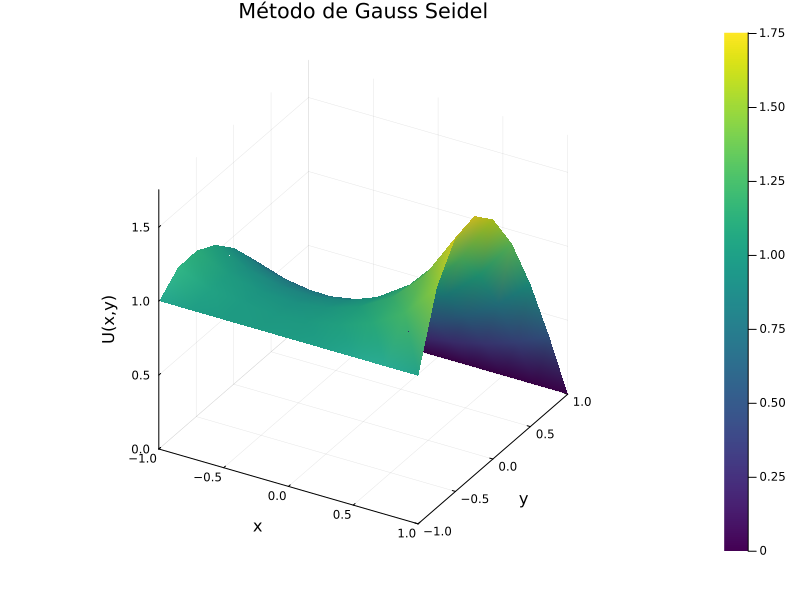

In [7]:
surface(x,y, U, 
        size=(800,600), 
        c=:viridis, 
        title="Método de Gauss Seidel",
        xlabel="x",
        ylabel="y",
        zlabel="U(x,y)")

## Resolviendo con el método SOR


para este método debemos considerar que:

para $i = 0$ tenemos que:

$$\overline{U}_{0,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(U_{1,j}^{iter} + U_{1,j}^{iter} + hU_{0,j}^{iter} + \lambda^2(U_{0,j-1}^{iter+1} + U_{0,j+1}^{iter} ))$$
$$U_{0,j}^{iter+1} = (1-w)U_{0,j}^{iter} + w\overline{U}_{0,j}^{iter+1}$$

para $i = nx$ tenemos que:
$$\overline{U}_{nx,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(2hU_{nx,j}^{iter} + U_{nx-1,j}^{iter+1} + U_{nx-1,j}^{iter+1} + \lambda^2(U_{nx,j-1}^{iter+1} + U_{nx,j+1}^{iter} ))$$
$$U_{nx,j}^{iter+1} = (1-w)U_{nx,j}^{iter} + w\overline{U}_{nx,j}^{iter+1}$$

para los demás valores de $i$ y $j$

$$\overline{U}_{i,j}^{iter+1} = \frac{1}{2(1+\lambda ^2)}(U_{i+1,j}^{iter} + U_{i-1,j}^{iter+1} + \lambda^2(U_{i,j-1}^{iter+1} + U_{i,j+1}^{iter} ))$$
$$U_{i,j}^{iter+1} = (1-w)U_{i,j}^{iter} + w\overline{U}_{i,j}^{iter+1}$$

In [8]:
function sor(fa, fb, fc, fd, a, b, c, d, nx,ny,f, maxiter, tol,w)
    
    x = LinRange(a, b, nx+1)
    y = LinRange(c, d, ny+1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = zeros(ny+1, nx+1)

    λ = h/k

    U[1, :] = map(fa, x)
    U[end, :] = map(fb, x)
    # U[:, 1] = map(fc, y)
    # U[:, end] = map(fd, y)
    
    iter = 1
    error = tol + 1
    V = copy(U)

    while iter < maxiter && error > tol
        for j in 2:ny
            for i in 1:nx+1
                if i==1
                    V[j,i] = (1/(2*(1 + λ^2)))*(U[j,i+1] + U[j,i+1] + h*U[j,i] + λ^2*(V[j-1,i] + U[j+1,i]) )
                    V[j,i] = (1-w)*U[j,i] + w*V[j,i]
                elseif i == nx+1
                    V[j,i] = (1/(2*(1 + λ^2)))*(2*h*U[j,i] + V[j,i-1] + V[j,i-1] + λ^2*(V[j-1,i] + U[j+1,i]) )
                    V[j,i] = (1-w)*U[j,i] + w*V[j,i]
                else 
                    V[j,i] = (1/(2*(1 + λ^2)))*(U[j,i+1] + V[j,i-1] + λ^2*(V[j-1,i] + U[j+1,i]) )
                    V[j,i] = (1-w)*U[j,i] + w*V[j,i]
                end
            end
        end
        error = maximum(abs.(U .- V))
        U = copy(V)
        iter += 1
    end
    
    return x,y,U, iter, error
end

sor (generic function with 1 method)

In [9]:
fa(x) = 1
fb(x) = 0
fc(y) = 0
fd(y) = 0
f(x,y) = 0

a,b = -1,1
c,d = -1,1
nx,ny = 8,8

maxiter = 5000
tol = 1e-5
w = 1.5

x,y,U, iter, error = sor(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol,w)
display(U)
println("Number of iterations: $iter")
println("Error: $error")

9×9 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0
 1.11722   1.03379   0.998836  0.991668     1.11927   1.24922   1.49076
 1.12199   1.01912   0.969887  0.961151     1.18184   1.38687   1.71921
 1.052     0.950821  0.900442  0.893975     1.16315   1.39719   1.75276
 0.921369  0.831728  0.787087  0.783936     1.05809   1.286     1.62106
 0.73969   0.667639  0.632245  0.631702  …  0.872952  1.06768   1.34895
 0.517196  0.466893  0.442555  0.443265     0.621546  0.762808  0.964906
 0.266016  0.240182  0.227817  0.228531     0.323004  0.397104  0.502605
 0.0       0.0       0.0       0.0          0.0       0.0       0.0

Number of iterations: 83
Error: 9.455593228180348e-6


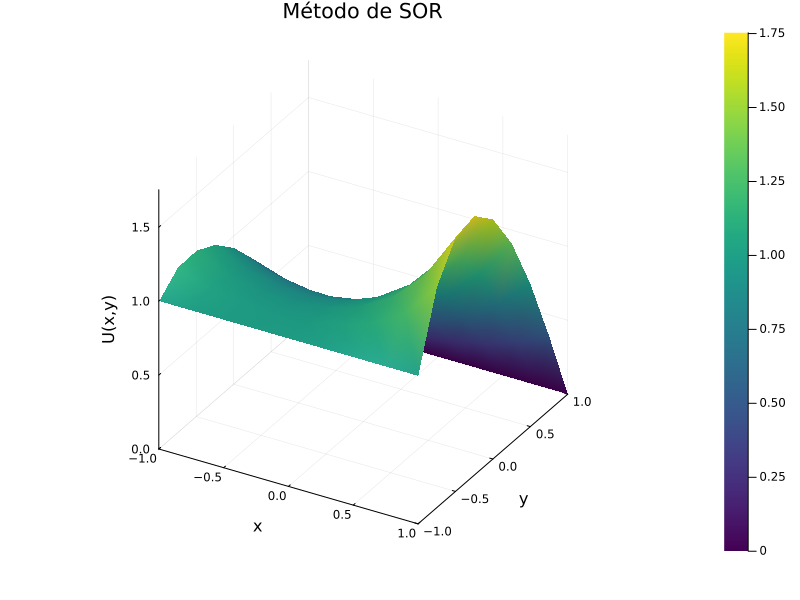

In [10]:
surface(x,y, U, 
        size=(800,600), 
        c=:viridis, 
        title="Método de SOR",
        xlabel="x",
        ylabel="y",
        zlabel="U(x,y)")